# Load Data from Dataset File with NumPy

### <font color="darkgreen">Load data from <font color="brown">mpg.csv</font> dataset file</font>

* This dataset can be downloaded at https://gist.github.com/omarish/5687264

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
mpg_ds = np.genfromtxt('mpg.csv', delimiter=",",
                       names=True, dtype=None, encoding='utf-8',
                       converters={3: lambda x: float(x.replace('?','0')),
                                   7: lambda x: x.replace('1', 'USA').replace('2', 'EU').replace('3', 'JP')})#Error becourse the lowercase letters jp see that lamp lol.

print('shape:', mpg_ds.shape, '\n')
print(mpg_ds[:10])

shape: (398,) 

[(18., 8, 307., 130., 3504, 12. , 70, 'USA', 'chevrolet chevelle malibu')
 (15., 8, 350., 165., 3693, 11.5, 70, 'USA', 'buick skylark 320')
 (18., 8, 318., 150., 3436, 11. , 70, 'USA', 'plymouth satellite')
 (16., 8, 304., 150., 3433, 12. , 70, 'USA', 'amc rebel sst')
 (17., 8, 302., 140., 3449, 10.5, 70, 'USA', 'ford torino')
 (15., 8, 429., 198., 4341, 10. , 70, 'USA', 'ford galaxie 500')
 (14., 8, 454., 220., 4354,  9. , 70, 'USA', 'chevrolet impala')
 (14., 8, 440., 215., 4312,  8.5, 70, 'USA', 'plymouth fury iii')
 (14., 8, 455., 225., 4425, 10. , 70, 'USA', 'pontiac catalina')
 (15., 8, 390., 190., 3850,  8.5, 70, 'USA', 'amc ambassador dpl')]


### <font color=green> Remove records with <font color="black">horsepower = 0

In [4]:
mpg_ds = mpg_ds[mpg_ds['horsepower'] > 0]

print('shape:', mpg_ds. shape)
print (mpg_ds[0:10])

shape: (392,)
[(18., 8, 307., 130., 3504, 12. , 70, 'USA', 'chevrolet chevelle malibu')
 (15., 8, 350., 165., 3693, 11.5, 70, 'USA', 'buick skylark 320')
 (18., 8, 318., 150., 3436, 11. , 70, 'USA', 'plymouth satellite')
 (16., 8, 304., 150., 3433, 12. , 70, 'USA', 'amc rebel sst')
 (17., 8, 302., 140., 3449, 10.5, 70, 'USA', 'ford torino')
 (15., 8, 429., 198., 4341, 10. , 70, 'USA', 'ford galaxie 500')
 (14., 8, 454., 220., 4354,  9. , 70, 'USA', 'chevrolet impala')
 (14., 8, 440., 215., 4312,  8.5, 70, 'USA', 'plymouth fury iii')
 (14., 8, 455., 225., 4425, 10. , 70, 'USA', 'pontiac catalina')
 (15., 8, 390., 190., 3850,  8.5, 70, 'USA', 'amc ambassador dpl')]


## <font color=darkblue>Plot Charts from mpg Dataset

Text(0.5, 1.0, 'Car Model Distribution by Origin')

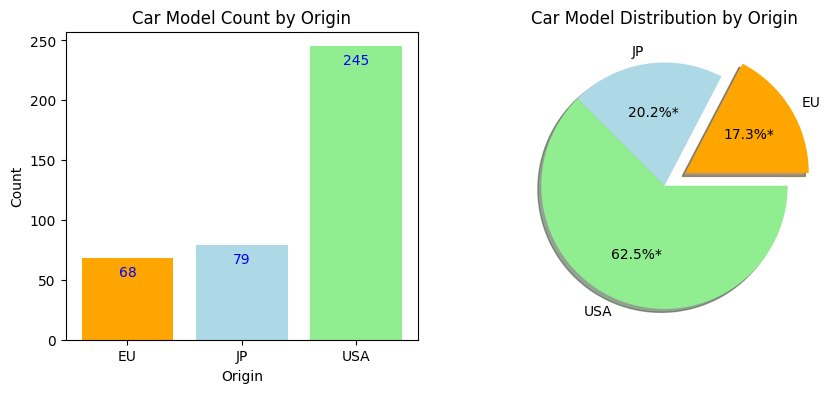

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
bar_ax, pie_ax = ax

origins, counts = np.unique(mpg_ds['origin'], return_counts=True)

# Bar chart
bar_chart = bar_ax.bar(origins, counts, color=['orange', 'lightblue', 'lightgreen'])

# Customize chart attributes
bar_ax.set_title('Car Model Count by Origin')
bar_ax.set_xlabel('Origin')
bar_ax.set_ylabel('Count')

# Customize to add annotation (data Label)
for x,y in np.stack((origins, counts), axis=1):
	y = int(y)
	bar_ax.annotate(y, (x,y), ha='center', color='blue', xytext=(x,y-15))

pie_chart = pie_ax.pie(counts, labels=origins ,colors=['orange', 'lightblue', 'lightgreen'],
                       autopct="%1.1f%%*", shadow=-True,
                       explode=(0.2, 0, 0))

pie_ax.set_title('Car Model Distribution by Origin')

## <font color="darkgreen">Exploratory Analysis of Car Models Attributes

Text(0, 0.5, 'Mpg')

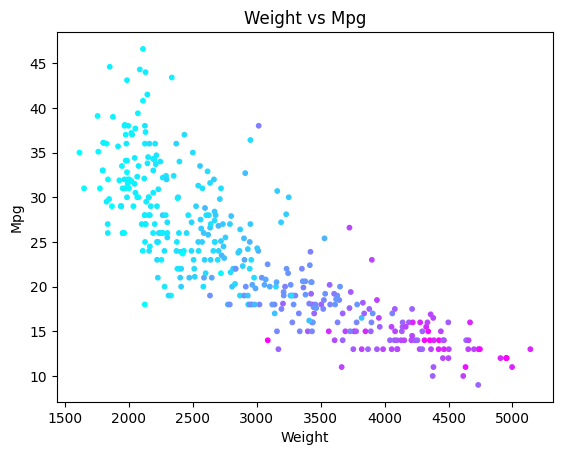

In [16]:
weights = mpg_ds['weight']
mpgs = mpg_ds['mpg']
disps = mpg_ds['displacement']

# Draw scatter chart
scatter_chart = plt.scatter(weights, mpgs, s=10, c=disps, cmap='cool')

plt.title('Weight vs Mpg')
plt.xlabel('Weight')
plt.ylabel('Mpg')



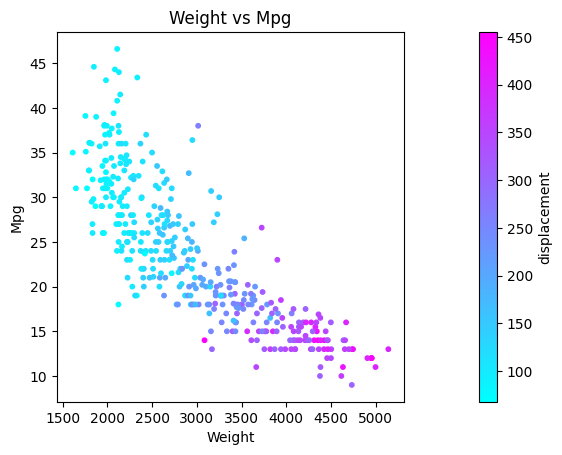

In [17]:
weights = mpg_ds['weight']
mpgs = mpg_ds['mpg']
disps = mpg_ds['displacement']

# Draw scatter chart
scatter_chart = plt.scatter(weights, mpgs, s=10, c=disps, cmap='cool')

plt.title('Weight vs Mpg')
plt.xlabel('Weight')
plt.ylabel('Mpg')

plt.colorbar(scatter_chart, label='displacement',
orientation='vertical', location='right', pad=0.15)